
## Módulos
Los módulos a utilizar son los siguiente:
- **numpy**: Proporciona estructuras y funcionalidades que facilitan el cálculo. En el proyecto es utilizado para el manejo de arreglos y el calculo de sumatorias 
- **sympy**: Modulo que permite escribir expresiones matemáticas para luego transformarlas en funciones.
- **matplotlib**: Librería que facilita la visualización de los datos.
- **pandas**: Proporciona un conjunto de funcionalidades para el análisis y manipulación de datos. Además, se utilizará para la lectura del archivo .CSV

In [1]:
#Se importan los modulos
import numpy as np 
import sympy as sym
import matplotlib.pyplot as plt
import pandas as pd

## I. Cargar el conjunto de datos Fish

In [2]:
path = "./dataset/Fish.csv" # Dirección de los datos a cargar en formato .csv

dataset = pd.read_csv(path) # Se usa pandas para leer el archivo .csv

## II. Se seleccionan las caracteristicas: ”Weight” y ”Height”, de la especie ”Bream”

     Height  Weight
0   11.5200   242.0
1   12.4800   290.0
2   12.3778   340.0
3   12.7300   363.0
4   12.4440   430.0
5   13.6024   450.0
6   14.1795   500.0
7   12.6700   390.0
8   14.0049   450.0
9   14.2266   500.0
10  14.2628   475.0
11  14.3714   500.0
12  13.7592   500.0
13  13.9129   340.0
14  14.9544   600.0
15  15.4380   600.0
16  14.8604   700.0
17  14.9380   700.0
18  15.6330   610.0
19  14.4738   650.0
20  15.1285   575.0
21  15.9936   685.0
22  15.5227   620.0
23  15.4686   680.0
24  16.2405   700.0
25  16.3600   725.0
26  16.3618   720.0
27  16.5170   714.0
28  16.8896   850.0
29  18.9570  1000.0
30  18.0369   920.0
31  18.0840   955.0
32  18.7542   925.0
33  18.6354   975.0
34  17.6235   950.0


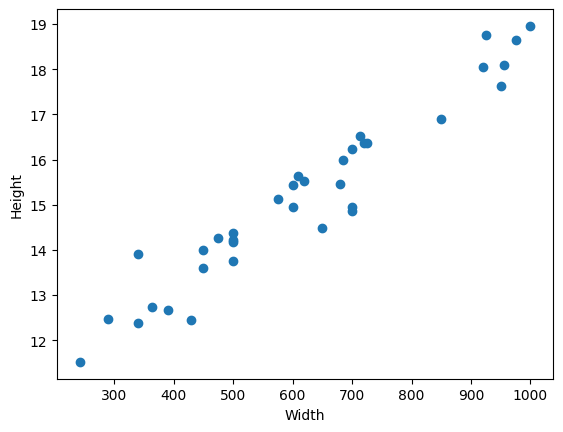

In [3]:
# Se filtran los datos para obtener solo los breams y se seleccionan las columnas de altura y anchura
breams = dataset[dataset.Species == "Bream"][['Height', 'Weight']] 
xi = np.array(breams.Weight) # Las medidas de anchura son asignados a xi 
yi = np.array(breams.Height) # Las medidas de altura son asignados a yi 
n = len(xi) # Número de elementos
print(breams)

plt.xlabel("Width")
plt.ylabel("Height")

plt.plot(xi,yi,'o',label='(xi,yi)')


## III. A) Regresión lineal 

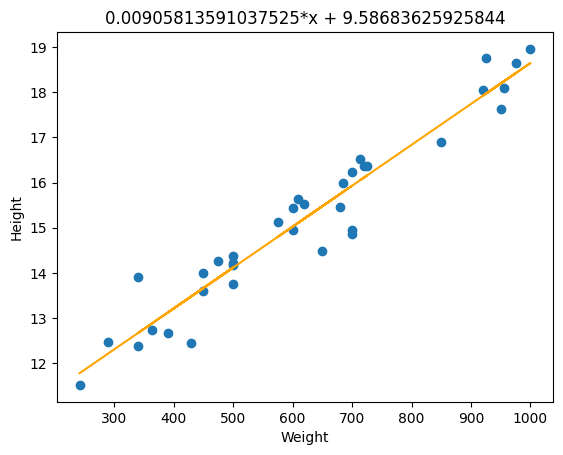

In [4]:
# sumatorias y medias
k1 = np.sum(xi*yi) # Se calcula k1 
k2 = np.sum(xi**2) # Se calcula k2
k3 = np.sum(xi)    # Se calcula k3
k4 = np.sum(yi)    # Se calcula k4

# coeficientes a0 y a1
m = (n*k1 - k3*k4)/(n*k2 - k3**2)  # Es obtenido el valor de la pendiente de la función afin
b = (k4*k2 - k3*k1)/(n*k2 - k3**2) # Es obtenido el valor de la ordenada de origen de la función afin

# Es usado las funcionalidades de sym para construir la función afin 
x = sym.Symbol('x') 
f = b + m*x
fx = sym.lambdify(x,f) # Transformas la expresión matemática en una función lambda para ser llamada con los valores de xi
fi = fx(xi)

# funcionalidades de la gráfica
plt.title(f); 

plt.xlabel("Weight")
plt.ylabel("Height")

plt.plot(xi,yi,'o',label='(xi,yi)')
plt.plot(xi,fi, color='orange', label=f)

## III. B) Regresión lineal con descenso gradiente 

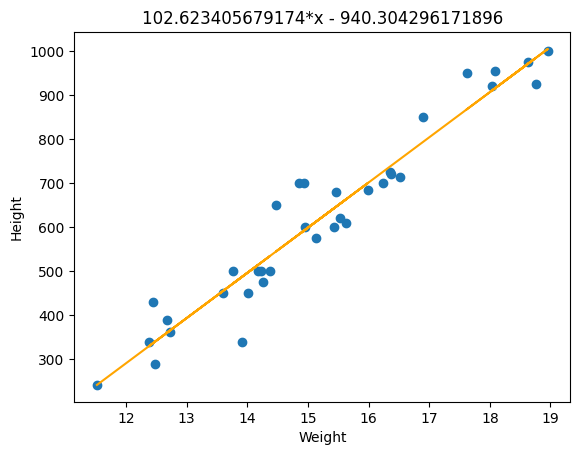

In [5]:
xi = np.array(breams.Height) # Las medidas de altura son asignados a xi 
yi = np.array(breams.Weight) # Las medidas de anchura son asignados a yi 

tol = 10**(-4) # Es asignada un valor a la tolerancia que será una condición de parada
lr = 0.01 # Parámetro de aprendizaje
m, b = [0,0] # Se inicializan los valores de m y b en 0

while (True) :
    
    dm = (-1/(2*n)) * np.sum((yi - m*xi - b)*xi) # Se calcula la derivada parcial de la función de pérdida con respecto a m
    db = (-1/(2*n)) * np.sum(yi - m*xi - b)      # Se calcula la derivada parcial de la función de pérdida con respecto a b

    if (np.isinf(dm)) or (np.isinf(db)): # Importante condición en caso de que ocurra overflow (cuando uno de los dos gradiente resulta infinito)
        break
    m = m - lr * dm # Se calcula el valor actual de m
    b = b - lr * db # Se calcula el valor actual de b
    
    if (abs(lr * dm) <= tol and abs(lr * db) <= tol): # Se evalúa la condición de parada, 
        break    

# Es usado las funcionalidades de sym para construir la función afin 
x = sym.Symbol('x') 
f = b + m*x
fx = sym.lambdify(x,f) # Transformas la expresión matemática en una función lambda para ser llamada con los valores de xi
fi = fx(xi)

plt.title(f); 

plt.xlabel("Weight")
plt.ylabel("Height")

plt.plot(xi,yi,'o',label='(xi,yi)')
plt.plot(xi,fi, color='orange', label=f)


## IV. Optimización del parametro de aprendizaje

El **parámetro de aprendizaje** más óptimo es **0.0048**

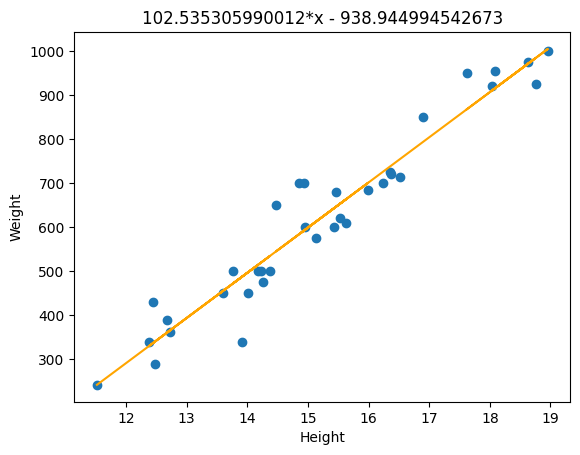

In [6]:
xi = np.array(breams.Height) # Las medidas de altura son asignados a xi 
yi = np.array(breams.Weight) # Las medidas de anchura son asignados a yi 

tol = 10**(-4) # Es asignada un valor a la tolerancia que será una condición de parada
lr = 0.0048 # Parámetro de aprendizaje
m, b = [0,0] # Se inicializan los valores de m y b en 0

while (True) :
    
    dm = (-1/(2*n)) * np.sum((yi - m*xi - b)*xi) # Se calcula la derivada parcial de la función de pérdida con respecto a m
    db = (-1/(2*n)) * np.sum(yi - m*xi - b)      # Se calcula la derivada parcial de la función de pérdida con respecto a b

    if (np.isinf(dm)) or (np.isinf(db)): 
        break
    
    m = m - lr * dm # Se calcula el valor actual de m
    b = b - lr * db # Se calcula el valor actual de b
    
    if (abs(lr * dm) <= tol and abs(lr * db) <= tol): # Se evalúa la condición de parada, 
        break    



# Es usado las funcionalidades de sym para construir la función afin 
x = sym.Symbol('x') 
f = b + m*x
fx = sym.lambdify(x,f) # Transformas la expresión matemática en una función lambda para ser llamada con los valores de xi
fi = fx(xi)

plt.title(f); 

plt.xlabel("Height")
plt.ylabel("Weight")

plt.plot(xi,yi,'o',label='(xi,yi)')
plt.plot(xi,fi, color='orange', label=f)
